In [2]:
# generates samples to estimate the dpp
import numpy as np
import matplotlib.pyplot as plt
from dppy.multivariate_jacobi_ope import MultivariateJacobiOPE

# The .plot() method outputs smtg only in dimension d=1 or 2

# Number of points / dimension
N, d = 50, 2
# Jacobi parameters in [-0.5, 0.5]^{d x 2}
jac_params = np.array([[0.5, 0.5],
                       [-0.3, 0.4]])

dpp = MultivariateJacobiOPE(N, jac_params)

number_samples = 10
# puts the samples as columns of matrix
for x in range(0, number_samples):
    # Get an exact sample
    sampl = dpp.sample()
    np.savetxt("samples/MultivariateJacobiOPE_sample"+str(x)+".csv", sampl, delimiter=",")


In [110]:
# Generate Gram matrix of kernel

# Number of points / dimension
N, d = 50, 2
# Jacobi parameters in [-0.5, 0.5]^{d x 2}
jac_params = np.array([[0.5, 0.5],
                       [-0.3, 0.4]])

dpp = MultivariateJacobiOPE(N, jac_params)

# construct a grid with n_step x n_step points in [-1+eps,1-eps]^2
n_step =  10
X = np.zeros(shape=(n_step*n_step,2))
t = 0
eps = 0.1
for i in range(n_step):
    for j in range(n_step):
        x = (-1+eps) + (2-2*eps)*(i)/(n_step-1)
        y = (-1+eps) + (2-2*eps)*(j)/(n_step-1)
        newrow = [x, y]
        X[t,:] =  newrow
        t = t + 1
# matrix de Gram de K_N        
GramMatrix = MultivariateJacobiOPE.K(dpp,X=X,Y=X, eval_pointwise=False)

# computing weights (from the measure mu)
w = MultivariateJacobiOPE.eval_w(dpp, X=X)

## INTENSITY:
intensity = np.multiply(np.diagonal(GramMatrix),w)
print(intensity)


[24.86190048 17.39633957 12.76192581 12.56195703 10.99676174 12.27460564
 11.28021253 14.3018     14.76748927 24.44605034 17.2987677  12.06563201
  9.03300847  8.72440087  7.780743    8.51800818  7.990149    9.92994225
 10.39735286 17.32850198 13.56130438  9.43001098  7.19566056  6.82743608
  6.19601097  6.66082473  6.36925272  7.76876627  8.24204564 13.82239942
 12.21550614  8.47784308  6.54646146  6.14306579  5.63582787  5.99025704
  5.7970326   6.98885108  7.47583857 12.5857126  11.89246122  8.24740915
  6.39807174  5.97800641  5.50763679  5.82819746  5.66654359  6.80061288
  7.29785178 12.30434895 11.89246122  8.24740915  6.39807174  5.97800641
  5.50763679  5.82819746  5.66654359  6.80061288  7.29785178 12.30434895
 12.21550614  8.47784308  6.54646146  6.14306579  5.63582787  5.99025704
  5.7970326   6.98885108  7.47583857 12.5857126  13.56130438  9.43001098
  7.19566056  6.82743608  6.19601097  6.66082473  6.36925272  7.76876627
  8.24204564 13.82239942 17.2987677  12.06563201  9

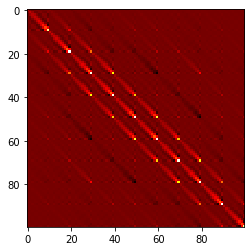

In [88]:
plt.imshow(CorrelationKernelGramMatrix, cmap='hot', interpolation='nearest')
plt.show()